In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

In [11]:
# Load the data from an Excel file
file_name = 'D:\Onedrive\experiments\experiments\matlab\control_systems\mpu_data_gz_5Hz_LPF.xlsx'
sheet_name = 'Sheet1'  # Replace with your sheet name if needed
# Read the Excel file
data = pd.read_excel(file_name, sheet_name=sheet_name)

# Extract signal values
signal = data.iloc[:, 0].values  # Assuming the signal is in the first column

# Known total time of collection and number of samples
total_time = 180  # Total time in seconds
N = len(signal)   # Number of samples
dt = total_time / N  # Time interval between samples
Fs = 1 / dt       # Sampling frequency

# Perform FFT
Y = fft(signal)                # Compute the FFT
frequencies = fftfreq(N, dt)   # Frequency bins
Y_magnitude = np.abs(Y)        # Magnitude of FFT

# Select positive frequencies only
positive_freqs = frequencies[:N // 2]
positive_magnitude = Y_magnitude[:N // 2]

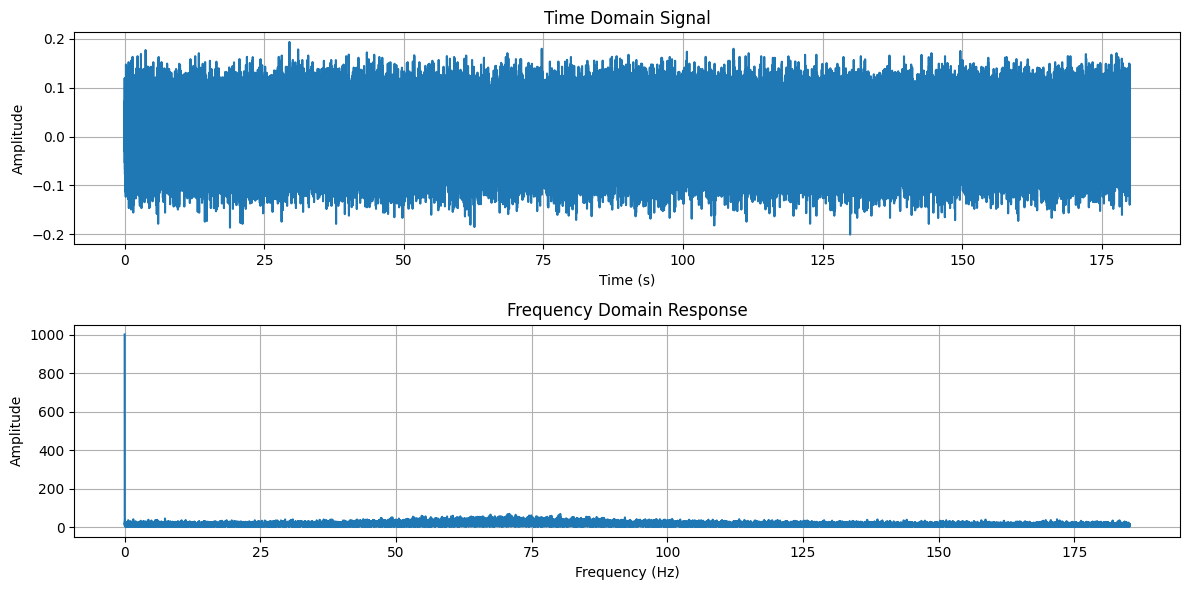

In [12]:
# Plot time domain signal
time = np.linspace(0, total_time, N)  # Generate time vector
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(time, signal)
plt.title('Time Domain Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

# Plot frequency domain response
plt.subplot(2, 1, 2)
plt.plot(positive_freqs, positive_magnitude)
plt.title('Frequency Domain Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()

# Display plots
plt.show()

In [13]:
# Optional: Find dominant frequency
dominant_freq_index = np.argmax(positive_magnitude)
dominant_frequency = positive_freqs[dominant_freq_index]
print(f"Dominant Frequency: {dominant_frequency:.2f} Hz")

Dominant Frequency: 0.00 Hz
